### Decision Tree Classification with Python

#### Method Used
A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.
Decision Tree consists of :

##### Nodes : Test for the value of a certain attribute.
##### Edges/ Branch : Correspond to the outcome of a test and connect to the next node or leaf.
##### Leaf nodes : Terminal nodes that predict the outcome (represent class labels or class distribution).

### TASK : Decision Tree Classification for IRIS Dataset &  Graphical Visualization of Decision Tree

So let's get started..

###  Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing IRIS dataset  and creating pandas DataFrame with imported iris dataset.

In [2]:
iris = sns.load_dataset('iris')

## Checking head of a dataset..
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Let us obtain some more information about this data set

We'll just check out a simple pairplot for this small dataset.

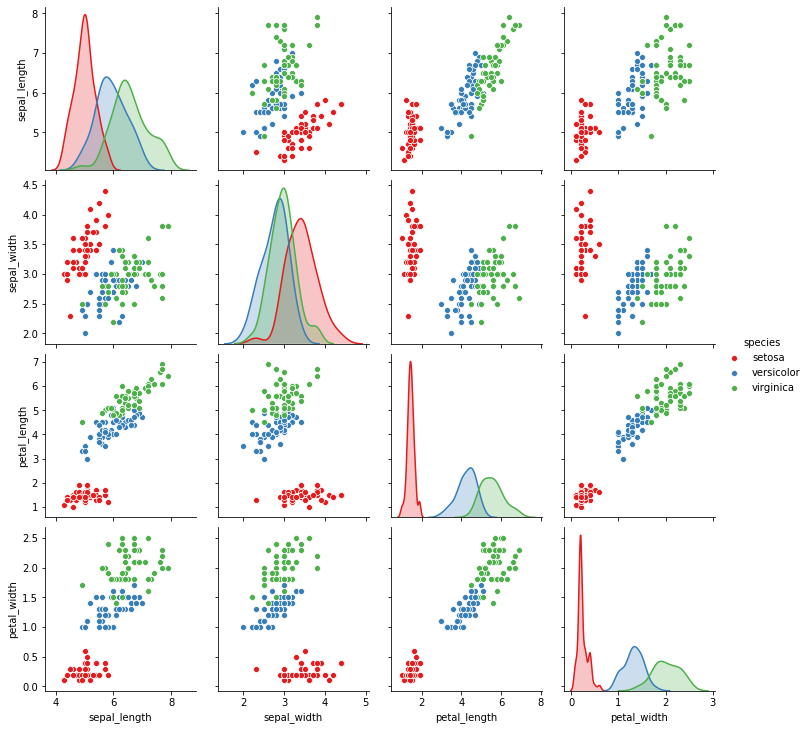

In [19]:
## Let's plot a pairplot to find relation between features of a dataset..
sns.pairplot(iris,hue='species',palette='Set1')

### Data Preparation

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = iris.drop('species',axis=1)
y = iris['species']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Decision Trees

We'll start just by training a single decision tree.

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dtree = DecisionTreeClassifier()

In [9]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Prediction and Evaluation 

Let's evaluate our decision tree.

In [10]:
predictions = dtree.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.92      0.96        13
   virginica       0.95      1.00      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [13]:
print(confusion_matrix(y_test,predictions))

[[14  0  0]
 [ 0 12  1]
 [ 0  0 18]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [17]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

features = list(iris.columns[1:])
features

['sepal_width', 'petal_length', 'petal_width', 'species']

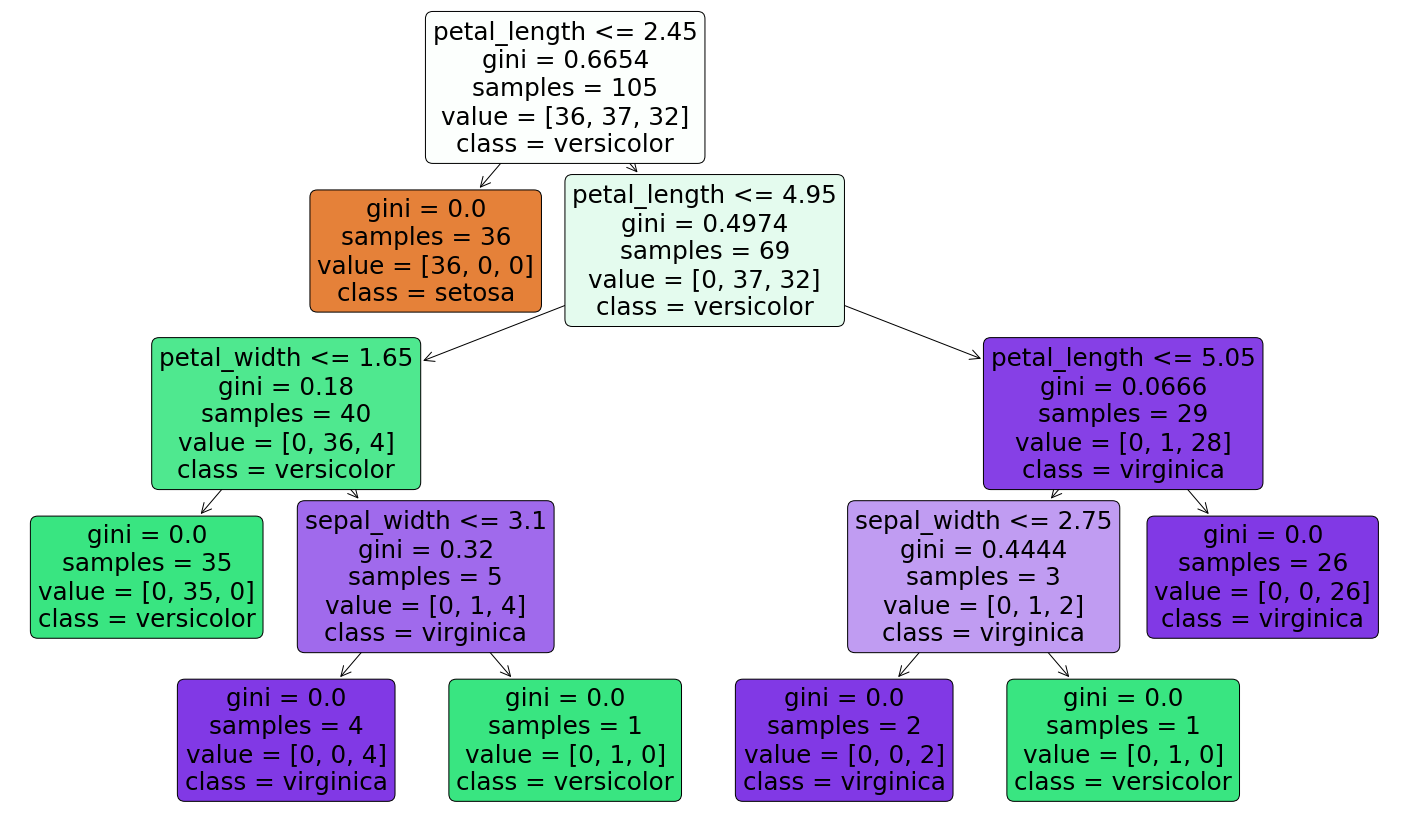

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,15))

tree_image = plot_tree(dtree,feature_names=iris.columns[:-1],class_names=iris['species'].unique().tolist(),
                       precision=4,label="all",filled=True,rounded=True)
plt.savefig('showTree')